In [18]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msgno


from IPython.display import display
import re

pd.set_option('display.max_columns',None)

In [19]:
os.chdir(r"c:\Users\Lori\PYTHON_PROJECTS\NORBI - statistical analysis")

In [20]:
df=pd.read_csv("cartype.csv")

In [21]:
df.head()

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,"6,0",12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,20.01.2014,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,"4,7",8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,19.05.2014,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,"4,7",8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,19.05.2014,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,"4,7",8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,19.05.2014,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,"4,7",8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,19.05.2014,681,461,582


In [22]:
def clean_column_names(df):
    col_names=[col.lower().replace(" ","_").replace("#","no_of") for col in df.columns.values]
    df.columns=col_names
    return df

df=clean_column_names(df)
df

,model_year,mfr_name,division,carline,engine_displacement,no_of_cylinders,transmission,city_fe,highway_fe,combined_fe,air_aspiration_method,transmission_description,no_of_gears,drive_desc,carline_class_desc,release_date,city_co2,highway_co2,combined_co2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,"6,0",12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,20.01.2014,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,"4,7",8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,19.05.2014,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,"4,7",8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,19.05.2014,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,"4,7",8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,19.05.2014,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,"4,7",8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,19.05.2014,681,461,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2015,Mercedes-Benz,Mercedes-Benz,GL 550 4MATIC,"4,7",8,Auto,13,18,15,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,15.07.2014,660,498,587
725,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,"3,5",6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,15.07.2014,506,396,456
726,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,"3,5",6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,23.07.2014,506,396,456
727,2015,Mercedes-Benz,Mercedes-Benz,ML 400 4MATIC,"3,0",6,Auto,18,22,20,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,04.07.2014,496,403,454


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   model_year                729 non-null    int64 
 1   mfr_name                  729 non-null    object
 2   division                  729 non-null    object
 3   carline                   729 non-null    object
 4   engine_displacement       729 non-null    object
 5   no_of_cylinders           729 non-null    int64 
 6   transmission              729 non-null    object
 7   city_fe                   729 non-null    int64 
 8   highway_fe                729 non-null    int64 
 9   combined_fe               729 non-null    int64 
 10  air_aspiration_method     729 non-null    object
 11  transmission_description  729 non-null    object
 12  no_of_gears               729 non-null    int64 
 13  drive_desc                729 non-null    object
 14  carline_class_desc        

<Axes: >

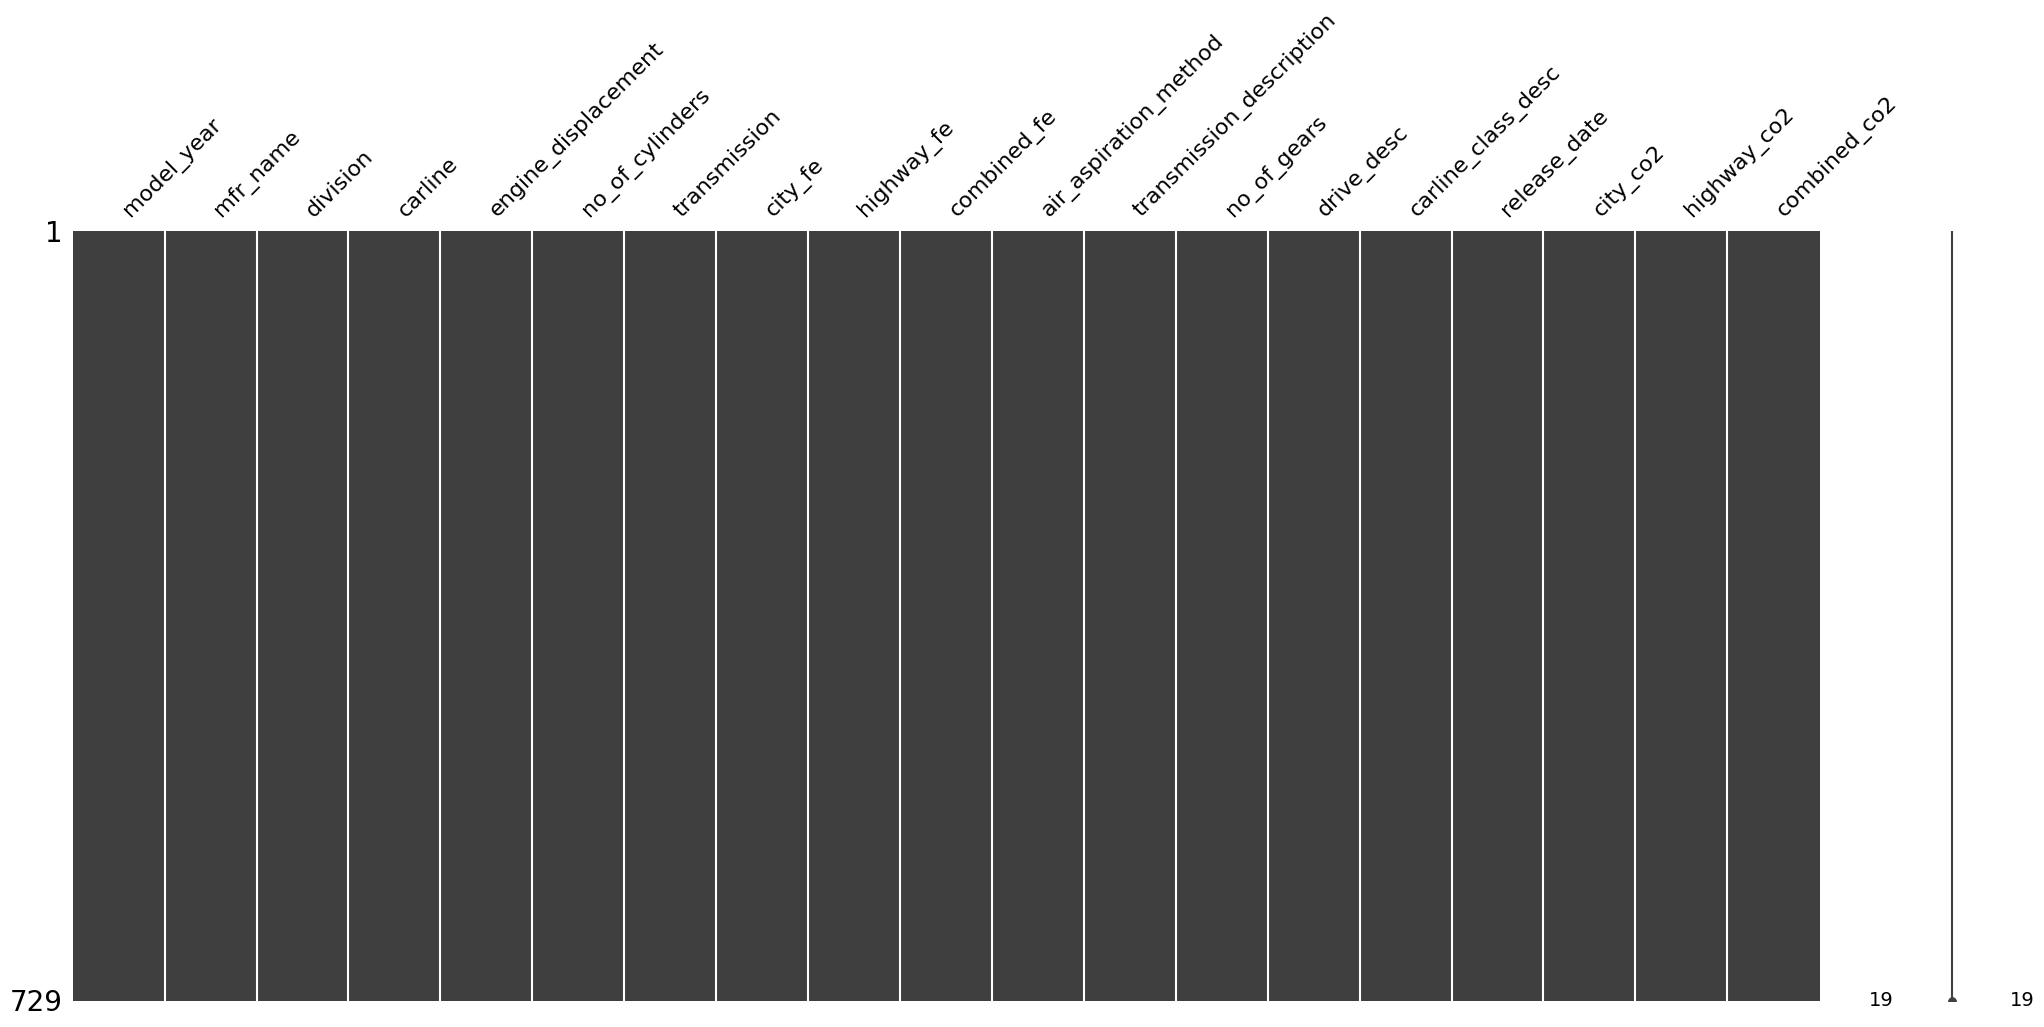

In [24]:
msgno.matrix(df)


In [25]:
def check_columns(df):
    col_names=df.columns.values
    for col_name in col_names:
        no_of_values=df[col_name].nunique()
        values_of_col=df[col_name].unique()
        print('--------------------')
        print(f"Column '{col_name}' has {no_of_values} distinct values and these are: {values_of_col}")
        
check_columns(df)

--------------------
Column 'model_year' has 1 distinct values and these are: [2015]
--------------------
Column 'mfr_name' has 18 distinct values and these are: ['aston martin' 'Volkswagen Group of' 'BMW' 'General Motors'
 'Jaguar Land Rover L' 'MAZDA' 'Mercedes-Benz' 'Nissan' 'Porsche'
 'Chrysler Group LLC' 'Toyota' 'Subaru' 'Ford Motor Company' 'Hyundai'
 'Honda' 'Kia' 'Mitsubishi Motors Co' 'Volvo']
--------------------
Column 'division' has 36 distinct values and these are: ['Aston Martin Lagonda Ltd' 'Audi' 'BMW' 'Bugatti' 'Chevrolet' 'Jaguar'
 'Lamborghini' 'MAZDA' 'Mercedes-Benz' 'Mini' 'NISSAN' 'Porsche' 'FIAT'
 'SCION' 'Subaru' 'Bentley' 'Ford' 'HYUNDAI MOTOR COMPANY' 'INFINITI'
 'Volkswagen' 'Acura' 'Buick' 'Cadillac' 'KIA MOTORS CORPORATION' 'LEXUS'
 'Mitsubishi Motors Corporation' 'TOYOTA'
 'Volvo Cars of North America, LLC' 'Chrysler' 'Dodge' 'Lincoln' 'Honda'
 'GMC' 'RAM' 'Jeep' 'Land Rover']
--------------------
Column 'carline' has 429 distinct values and these are: ['

In [148]:
# cleaning function

def clean_text(df,col_name,char_list=None,subtext_list=None,one_hot_encode=False):
    temp_df=df.copy(deep=True)
    
    if subtext_list:
        temp_df[col_name]=temp_df[col_name].replace(subtext_list,"",regex=True)
        temp_df[col_name]=temp_df[col_name].str.strip()
       
    temp_df[col_name]=temp_df[col_name].str.lower()
    
    
      
    if one_hot_encode:
        orig_col_name=f"{col_name}_orig"
        temp_df[orig_col_name]=temp_df[col_name]
        temp_df[col_name]=temp_df[col_name].apply(lambda value: re.sub(char_list,r'_',value))
        temp_df[col_name]=temp_df[col_name].apply(lambda value: re.sub('[\s+]','_',value))
        temp_df[col_name]=temp_df[col_name].apply(lambda value: re.sub('_{2,}','_',value))
        temp_df=pd.get_dummies(temp_df, columns=[col_name],dtype=np.int0)
    
    else:
        if char_list:
            temp_df[col_name]=temp_df[col_name].apply(lambda value: re.sub(char_list,r' ',value))
        
    return temp_df

def clean_between_parantheses(df,col_name):
    temp_df=df.copy(deep=True)
    temp_df[col_name]=temp_df[col_name].apply(lambda value: re.sub(r'\([^)]*\)','', value))
    temp_df[col_name]=temp_df[col_name].str.strip()
    
    return temp_df

def get_stats_num(df,column_list):
    print(f'Descriptive statistics for numeric columns\n')
    for col_name in column_list:
        stat_mean=df[col_name].mean()
        stat_median=df[col_name].median()
        stat_mode=df[col_name].mode().values[0]
        stat_range=df[col_name].max()-df[col_name].min()
        stat_variance=df[col_name].var()
        stat_std=df[col_name].std()
        stat_percs=df[col_name].quantile(q=np.linspace(0.1,1,10)).values
        stats_rank=df.sort_values(by=col_name)[col_name].rank(method='dense').max()
        
        print(f'Descriptive statistics for column: {col_name}:')
        
        print(f"\tMean: {np.round(stat_mean,2)}")
        print(f"\tMedian: {np.round(stat_median,2)}")
        print(f"\tMode: {np.round(stat_mode,2)}")
        print(f"\tRange: {np.round(stat_range,0)}")
        print(f"\tVariance: {np.round(stat_variance,2)}")
        print(f"\tStandard deviation: {np.round(stat_std,2)}")
        print(f"\tPercentiles: stat_percs")
        print(f"\tRank: {np.round(stats_rank,2)}")
        print(f"------------------------\n")
        
        
def get_stat_qual(df,col_list):
    print(f'Qualitative statistics\n')
    for col_name in col_list:
        stat_count=df.shape[0]
        stat_unique=df[col_name].nunique()
        stat_top=df[col_name].mode().values[0]
        stat_freq=df[col_name].value_counts()[0]
        
        print(f'Qualitative statistics for column: {col_name}:')
        
        print(f"\tCount: {stat_count}")
        print(f"\tUnique values: {stat_unique}")
        print(f"\tMost frequent value: {stat_top}")
        print(f"\tCount of most frequent value: {stat_freq}")
        print(f"------------------------\n")

In [27]:
new_df=df.copy(deep=True)

In [93]:
df=new_df.copy(deep=True)

Cleaning data

In [94]:
#drop first column (only on year available)
df.drop(columns=["model_year"],inplace=True)

#cleaning car make column
df=clean_text(df=df, 
           col_name="mfr_name",
           char_list='[-]',
           subtext_list=["Group of", "Group LLC","Motor Company","Motors Co","L"],
           one_hot_encode=True)

#cleaning division column
df=clean_text(df=df, 
           col_name="division",
           char_list='[-]',
           subtext_list=["Lagonda Ltd", "MOTOR COMPANY", "MOTORS CORPORATION", "Motors Corporation", "Cars of North America, LLC", ""],
           one_hot_encode=False)

#cleaning carline column
df=clean_text(df=df, 
           col_name="carline")

# convertin engine displacement from text/object to float
df["engine_displacement"]=df["engine_displacement"].str.replace(",",".")
df["engine_displacement"]=df["engine_displacement"].astype("float")

# encoding transmission
df["auto_transmission"]=df["transmission"].apply(lambda value: 1 if "Auto" else 0)

#cleaning text between parantheses in transmission description column
df=clean_between_parantheses(df=df, col_name="transmission_description")

#cleaning transmission description column
df=clean_text(df=df, 
           col_name="transmission_description",
           char_list='[-]',
           one_hot_encode=True)

In [95]:
#strangely the Porsche Boxter GTS drive description shows a 'd', checking on the internet it is a '2-Wheel Drive, Rear'
df.query("drive_desc=='d'")

,division,carline,engine_displacement,no_of_cylinders,transmission,city_fe,highway_fe,combined_fe,air_aspiration_method,no_of_gears,drive_desc,carline_class_desc,release_date,city_co2,highway_co2,combined_co2,mfr_name_orig,mfr_name_aston_martin,mfr_name_bmw,mfr_name_chrysler,mfr_name_ford,mfr_name_general_motors,mfr_name_honda,mfr_name_hyundai,mfr_name_jaguar_and_rover,mfr_name_kia,mfr_name_mazda,mfr_name_mercedes_benz,mfr_name_mitsubishi,mfr_name_nissan,mfr_name_porsche,mfr_name_subaru,mfr_name_toyota,mfr_name_volkswagen,mfr_name_volvo,auto_transmission,transmission_description_orig,transmission_description_automated_manual,transmission_description_automated_manual_selectable,transmission_description_automatic,transmission_description_continuously_variable,transmission_description_manual,transmission_description_selectable_continuously_variable,transmission_description_semi_automatic
62,porsche,boxster gts,3.4,6,Manual,19,26,22,Naturally Aspirated,6,d,Two Seaters,23.06.2014,458,334,402,porsche,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,manual,0,0,0,0,1,0,0


In [96]:
# overwriting the Porsche Boxter GTS drive description 'd' to '2-Wheel Drive, Rear'
df.loc[62,"drive_desc"]='2-Wheel Drive, Rear'

In [97]:
#cleaning drive description column
df=clean_text(df=df, 
           col_name="drive_desc",
           char_list='[-,]',
           one_hot_encode=True)

#one hot encoding carline class descripition column
df=clean_text(df=df, 
           col_name="carline_class_desc",
           char_list='[-,]',
           one_hot_encode=True)

#converting release date object to datetime format
df['release_date']=pd.to_datetime(df['release_date'])

#creating a release year column
df['release_year']=df['release_date'].dt.year

In [137]:
# descriptive statistics for quantitative data

col_list=['engine_displacement','no_of_cylinders','city_fe','highway_fe','combined_fe','no_of_gears','city_co2','highway_co2','combined_co2']

get_stats_num(df,col_list)

Descriptive statistics for numeric columns

Descriptive statistics for column: engine_displacement:
	Mean: 3.15
	Median: 3.0
	Mode: 2.0
	Range: 7.0
	Variance: 1.84
	Standard deviation: 1.36
	Percentiles: stat_percs
	Rank: 38.0
------------------------

Descriptive statistics for column: no_of_cylinders:
	Mean: 5.63
	Median: 6.0
	Mode: 4
	Range: 13
	Variance: 3.26
	Standard deviation: 1.81
	Percentiles: stat_percs
	Rank: 8.0
------------------------

Descriptive statistics for column: city_fe:
	Mean: 20.08
	Median: 20.0
	Mode: 17
	Range: 36
	Variance: 24.33
	Standard deviation: 4.93
	Percentiles: stat_percs
	Rank: 31.0
------------------------

Descriptive statistics for column: highway_fe:
	Mean: 28.23
	Median: 28.0
	Mode: 24
	Range: 31
	Variance: 33.63
	Standard deviation: 5.8
	Percentiles: stat_percs
	Rank: 32.0
------------------------

Descriptive statistics for column: combined_fe:
	Mean: 23.02
	Median: 23.0
	Mode: 18
	Range: 32
	Variance: 27.38
	Standard deviation: 5.23
	Percenti

In [147]:
# descriptive statistics for qualitative data

qual_col_list=["division",'transmission','air_aspiration_method','mfr_name_orig','transmission_description_orig','drive_desc_orig','carline_class_desc_orig']

get_stat_qual(df,qual_col_list)

Qualitative statistics

Qualitative statistics for column: division:
	Count: 729
	Unique values: 36
	Most frequent value: bmw
	Count of most frequent value: 85
------------------------

Qualitative statistics for column: transmission:
	Count: 729
	Unique values: 2
	Most frequent value: Auto
	Count of most frequent value: 580
------------------------

Qualitative statistics for column: air_aspiration_method:
	Count: 729
	Unique values: 4
	Most frequent value: Naturally Aspirated
	Count of most frequent value: 413
------------------------

Qualitative statistics for column: mfr_name_orig:
	Count: 729
	Unique values: 18
	Most frequent value: general motors
	Count of most frequent value: 127
------------------------

Qualitative statistics for column: transmission_description_orig:
	Count: 729
	Unique values: 7
	Most frequent value: semi-automatic
	Count of most frequent value: 293
------------------------

Qualitative statistics for column: drive_desc_orig:
	Count: 729
	Unique values: 5
	

In [ ]:
carline_class_desc_orig

In [ ]:
What type of car provides the most fuel economy?

What type of car is environmentally friendly?



In [ ]:
carline_class_desc_orig, 'city_fe', 'highway_fe', 'combined_fe'

In [164]:
def custom_plot(df,x,y_list):
    melted=pd.melt(df,id_vars=x,value_vars=y_list,var_name="hue_col")
    plt.figure(figsize=(20,12))
    sns.barplot(melted,x=x,y="value",hue="hue_col")
    plt.xticks(rotation=90)
    plt.show()
    

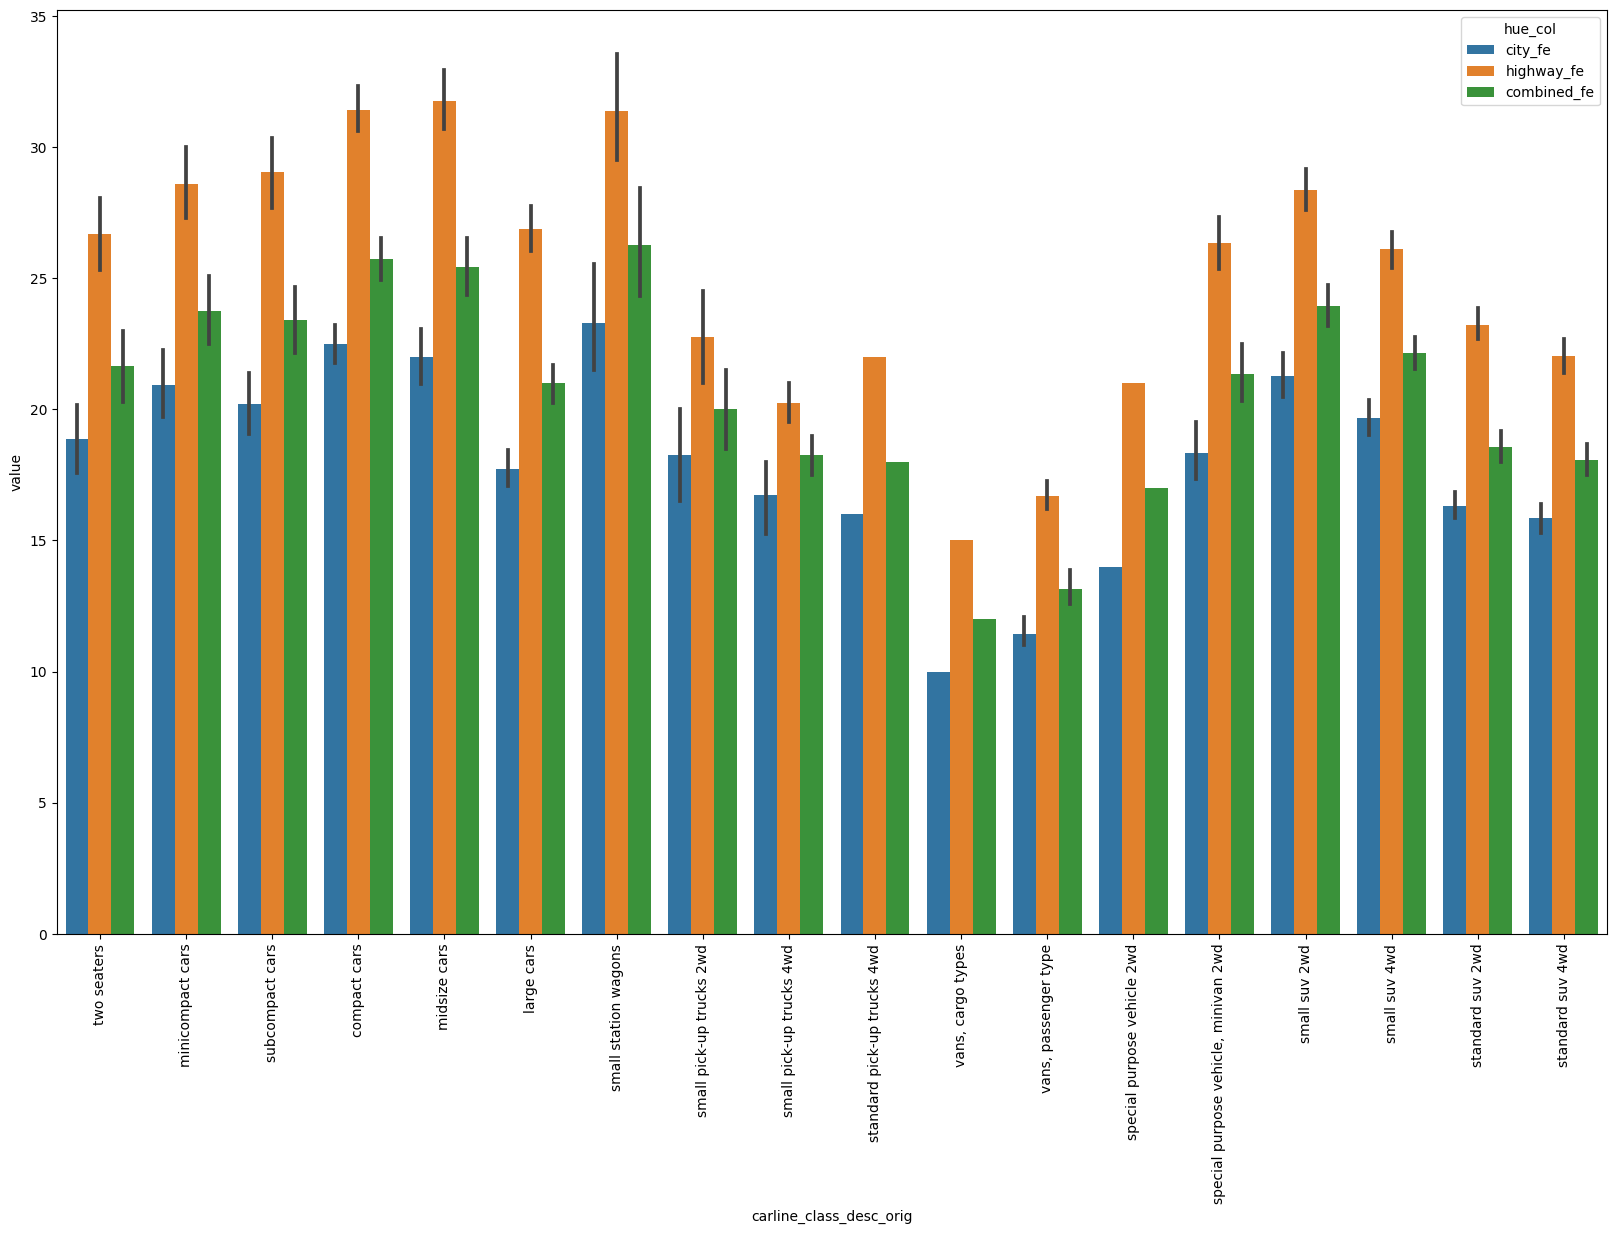

In [165]:
custom_plot(df,'carline_class_desc_orig',['city_fe', 'highway_fe', 'combined_fe'])

In [159]:
pd.melt(df,id_vars="carline_class_desc_orig",value_vars=['city_fe', 'highway_fe', 'combined_fe'])

,carline_class_desc_orig,variable,value
0,two seaters,city_fe,12
1,two seaters,city_fe,14
2,two seaters,city_fe,13
3,two seaters,city_fe,14
4,two seaters,city_fe,13
...,...,...,...
2182,standard suv 4wd,combined_fe,15
2183,standard suv 4wd,combined_fe,19
2184,standard suv 4wd,combined_fe,19
2185,standard suv 4wd,combined_fe,20


In [158]:
df.columns

Index(['division', 'carline', 'engine_displacement', 'no_of_cylinders',
       'transmission', 'city_fe', 'highway_fe', 'combined_fe',
       'air_aspiration_method', 'no_of_gears', 'release_date', 'city_co2',
       'highway_co2', 'combined_co2', 'mfr_name_orig', 'mfr_name_aston_martin',
       'mfr_name_bmw', 'mfr_name_chrysler', 'mfr_name_ford',
       'mfr_name_general_motors', 'mfr_name_honda', 'mfr_name_hyundai',
       'mfr_name_jaguar_and_rover', 'mfr_name_kia', 'mfr_name_mazda',
       'mfr_name_mercedes_benz', 'mfr_name_mitsubishi', 'mfr_name_nissan',
       'mfr_name_porsche', 'mfr_name_subaru', 'mfr_name_toyota',
       'mfr_name_volkswagen', 'mfr_name_volvo', 'auto_transmission',
       'transmission_description_orig',
       'transmission_description_automated_manual',
       'transmission_description_automated_manual_selectable',
       'transmission_description_automatic',
       'transmission_description_continuously_variable',
       'transmission_description_manual',

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'two seaters'),
  Text(1, 0, 'minicompact cars'),
  Text(2, 0, 'subcompact cars'),
  Text(3, 0, 'compact cars'),
  Text(4, 0, 'midsize cars'),
  Text(5, 0, 'large cars'),
  Text(6, 0, 'small station wagons'),
  Text(7, 0, 'small pick-up trucks 2wd'),
  Text(8, 0, 'small pick-up trucks 4wd'),
  Text(9, 0, 'standard pick-up trucks 4wd'),
  Text(10, 0, 'vans, cargo types'),
  Text(11, 0, 'vans, passenger type'),
  Text(12, 0, 'special purpose vehicle 2wd'),
  Text(13, 0, 'special purpose vehicle, minivan 2wd'),
  Text(14, 0, 'small suv 2wd'),
  Text(15, 0, 'small suv 4wd'),
  Text(16, 0, 'standard suv 2wd'),
  Text(17, 0, 'standard suv 4wd')])

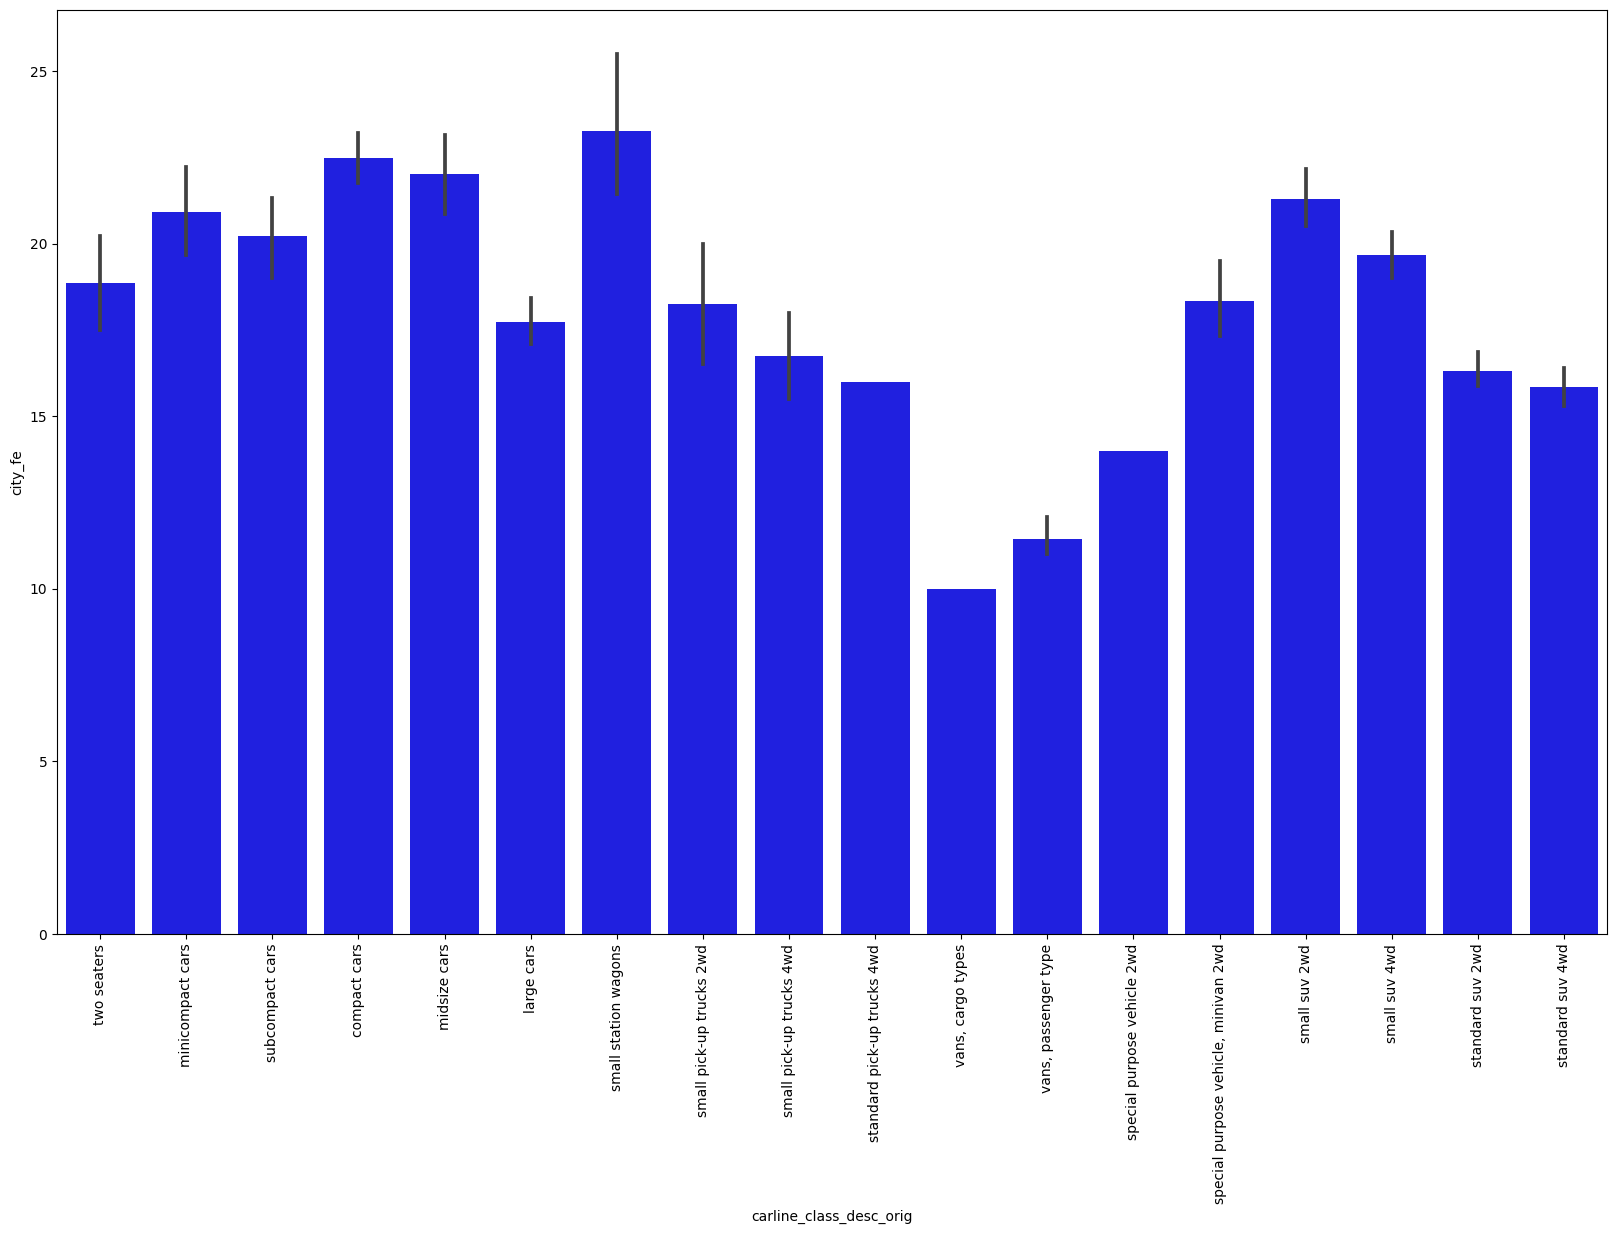

In [157]:
plt.figure(figsize=(20,12))
sns.barplot(data=df,x="carline_class_desc_orig",y="city_fe",color='b')
plt.xticks(rotation=90)


In [166]:
df.columns

Index(['division', 'carline', 'engine_displacement', 'no_of_cylinders',
       'transmission', 'city_fe', 'highway_fe', 'combined_fe',
       'air_aspiration_method', 'no_of_gears', 'release_date', 'city_co2',
       'highway_co2', 'combined_co2', 'mfr_name_orig', 'mfr_name_aston_martin',
       'mfr_name_bmw', 'mfr_name_chrysler', 'mfr_name_ford',
       'mfr_name_general_motors', 'mfr_name_honda', 'mfr_name_hyundai',
       'mfr_name_jaguar_and_rover', 'mfr_name_kia', 'mfr_name_mazda',
       'mfr_name_mercedes_benz', 'mfr_name_mitsubishi', 'mfr_name_nissan',
       'mfr_name_porsche', 'mfr_name_subaru', 'mfr_name_toyota',
       'mfr_name_volkswagen', 'mfr_name_volvo', 'auto_transmission',
       'transmission_description_orig',
       'transmission_description_automated_manual',
       'transmission_description_automated_manual_selectable',
       'transmission_description_automatic',
       'transmission_description_continuously_variable',
       'transmission_description_manual',

In [ ]:
Column 'transmission_description' has 7 distinct values and these are: ['Automated Manual' 'Manual'
 'Automated Manual- Selectable (e.g. Automated Manual with paddles)'
 'Semi-Automatic' 'Automatic' 'Continuously Variable'
 'Selectable Continuously Variable (e.g. CVT with paddles)']

In [ ]:
- modell!


In [31]:
string='Automated Manual- Selectable (e.g. Automated Manual with paddles)'

In [32]:
re.sub(r'\([^)]*\)','', string)

'Automated Manual- Selectable '

In [128]:
df=clean_text(df=df, 
           col_name="mfr_name",
           char_list='[-]',
           subtext_list=["Group of", "Group LLC","Motor Company","Motors Co","L"],
           one_hot_encode=True)

In [130]:
df.columns

Index(['model_year', 'division', 'carline', 'engine_displacement',
       'no_of_cylinders', 'transmission', 'city_fe', 'highway_fe',
       'combined_fe', 'air_aspiration_method', 'transmission_description',
       'no_of_gears', 'drive_desc', 'carline_class_desc', 'release_date',
       'city_co2', 'highway_co2', 'combined_co2', 'mfr_name_orig',
       'mfr_name_aston_martin', 'mfr_name_bmw', 'mfr_name_chrysler',
       'mfr_name_ford', 'mfr_name_general_motors', 'mfr_name_honda',
       'mfr_name_hyundai', 'mfr_name_jaguar_and_rover', 'mfr_name_kia',
       'mfr_name_mazda', 'mfr_name_mercedes_benz', 'mfr_name_mitsubishi',
       'mfr_name_nissan', 'mfr_name_porsche', 'mfr_name_subaru',
       'mfr_name_toyota', 'mfr_name_volkswagen', 'mfr_name_volvo'],
      dtype='object')

In [77]:
subtext_list=["L", "Group of", "Group LLC","Motor Company","Motors Co"]

In [80]:
df["mfr_name"].replace(subtext_list,"",regex=True)

0       aston martin
1       aston martin
2       aston martin
3       aston martin
4       aston martin
           ...      
724    Mercedes-Benz
725    Mercedes-Benz
726    Mercedes-Benz
727    Mercedes-Benz
728      Volkswagen 
Name: mfr_name, Length: 729, dtype: object

In [68]:
orig_text="this is my-text! so & shut # the fuck up!!!"

In [75]:
result=re.sub('[\s+!&#-]','_',orig_text)
result

'this_is_my_text__so___shut___the_fuck_up___'

In [76]:
re.sub('_{2,}','_',result)

'this_is_my_text_so_shut_the_fuck_up_'

In [89]:
a='Chrysler Group LLC'
b='Group LLC'

a.replace(b,"")

'Chrysler '